In [3]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/31/6c/c1f6bc2ca251c627976acae937f4f27f7349300e2b69b711e47b092d2642/tensorflow-2.1.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/12/5f/e781305bd0428f02aca645e23c09a75c508a063bf0247da9deda94d58b37/grpcio-1.27.2-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ff/52/a71156b82dbb8a40833b7a571e22c9e65ca4204a56739f97d3eaa25d111e/protobuf-3.11.3-cp36-cp36m-win_amd64.whl
  Using cached https://f

    DEPRECATION: Uninstalling a distutils installed project (wrapt) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf

In [6]:
import numpy as np

In [7]:
import math

In [8]:
import matplotlib.pyplot as plt

In [9]:
import matplotlib.animation as animation

In [10]:
num_house=160

In [11]:
np.random.seed(42)

In [12]:
house_size=np.random.randint(low=1000,high=3500,size=num_house)

In [13]:
house_price=house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)

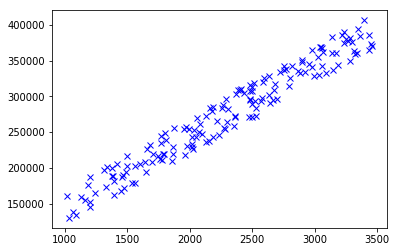

In [14]:
plt.plot(house_size,house_price,"bx")

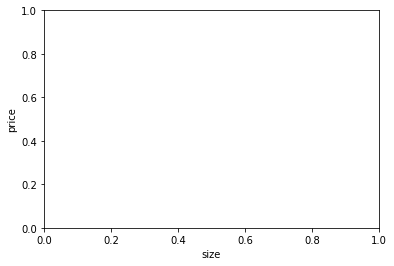

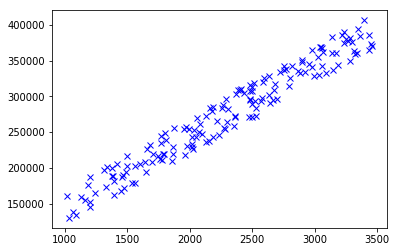

In [19]:
plt.ylabel("price")
plt.xlabel("size")
plt.show()
plt.plot(house_size,house_price,"bx")

In [22]:
sess=tf.Session()

AttributeError: module 'tensorflow' has no attribute 'session'

In [25]:
tf.__version__

'2.1.0'

In [26]:
hello=tf.constant("hello")

In [27]:
print(hello)

tf.Tensor(b'hello', shape=(), dtype=string)


In [28]:
def normalize(array):
    return(array - array.mean())/ array.std()

In [29]:
num_train_samples=math.floor(num_house * 0.7)

In [34]:
train_house_size=np.asarray(house_size[:num_train_samples])
train_price=np.asanyarray(house_price[:num_train_samples:])

In [31]:
train_house_size_norm=normalize(train_house_size)
train_price_norm=normalize(train_price)

In [35]:
test_house_size=np.array(house_size[num_train_samples:])
test_price=np.array(house_price[num_train_samples:])

In [37]:
test_house_size_norm=normalize(test_house_size)
test_price_norm=normalize(test_price)

In [41]:
tf_house_size=tf.placeholder("float",name="house_size")
tf_price=tf.placeholder("float",name="price")

In [39]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [43]:
tf_size_factor=tf.Variable(np.random.randn(),name="size_factor")

In [44]:
tf_price_offset=tf.Variable(np.random.randn(),name="price_offset")

In [45]:
tf_price_pred=tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_price_offset)

In [46]:
tf_cost=tf.reduce_sum(tf.pow(tf_price_pred-tf_price,2))/(2*num_train_samples)

In [47]:
learning_rate=0.1

In [48]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)